<a href="https://colab.research.google.com/github/Hanpablo/-course/blob/main/Tugas_ML2_Regression_Uji_Asumsi_Klasik_Syihan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#Import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Ecommerce.csv')

In [ ]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   499 non-null    float64
 4   Time on App           497 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  496 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]

In [ ]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620146
498,33.322501,12.391423,36.840086,2.336485,456.469510


#Data Cleaning

In [ ]:
df.isna().sum()

Avg. Session Length     1
Time on App             3
Time on Website         0
Length of Membership    4
Yearly Amount Spent     0
dtype: int64

In [ ]:
df[df.isna().any(axis=1)]

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
22,31.531604,NaN,38.734006,2.245148,436.515606
34,32.820310,11.634893,35.368626,NaN,507.441832
47,32.726785,NaN,36.462003,4.113226,563.672873
58,NaN,11.832286,36.814011,NaN,496.650708
70,33.154176,11.887494,36.265001,NaN,444.966552
80,31.514738,NaN,39.600376,3.751735,489.812488
89,32.605584,12.068816,36.105001,NaN,505.113343


In [ ]:
# mengisi setiap nilai kosong atau missing values dengan nilai mean

df['Avg. Session Length'] = df['Avg. Session Length'].fillna(np.mean(df['Avg. Session Length']))

In [ ]:
df['Time on App'] = df['Time on App'].fillna(np.mean(df['Time on App']))

In [ ]:
df['Length of Membership'] = df['Length of Membership'].fillna(np.mean(df['Length of Membership']))

In [ ]:
df[df.isna().any(axis=1)]

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


Check duplicated object

In [ ]:
df.duplicated().sum()

0

#Uji Normalitas
Deteksi Outlier dan Remove

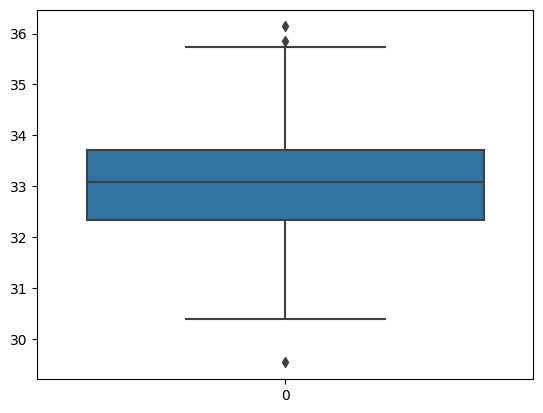

In [ ]:
# pengecekan outlier pada Avg. Session Length
sns.boxplot(df['Avg. Session Length'])
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053613,0.992519,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.046844,0.991243,8.508152,11.388153,11.983231,12.730343,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533497,0.997905,0.269901,2.934588,3.533497,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [ ]:
# Deteksi menggunakan IQR
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [ ]:
upper, lower = outliers(df, "Avg. Session Length")
print("Upper: ", upper)
print("Lower: ", lower)
# batas bawah dan batas atas IQR telah ditentukan

Upper:  35.76722955875
Lower:  30.286577468749993


In [ ]:
df = df[(df['Avg. Session Length'] > lower) & (df['Avg. Session Length'] < upper)]

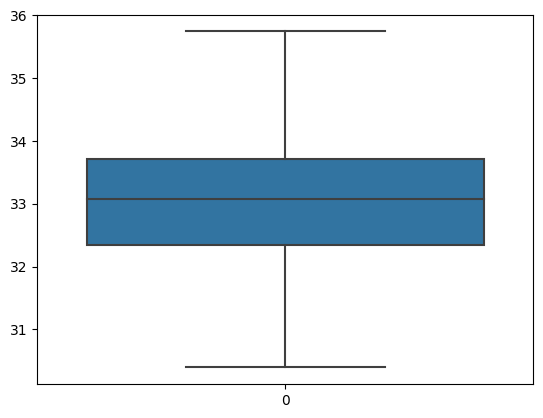

In [ ]:
# Outlier pada Avg. Session Length telah ditekan sehingga tidak ada data diatas 36 dan dibawah 31
sns.boxplot(df['Avg. Session Length'])
plt.show()

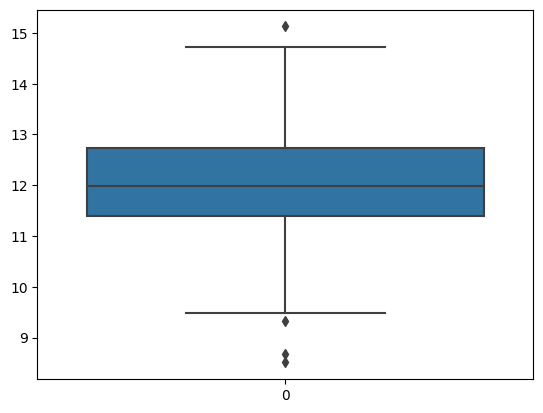

In [ ]:
sns.boxplot(df['Time on App'])
plt.show()

Terdapat outliers pada batas bawah dan batas atas Time on App sehingga kita harus menghilangkan data outliers tersebut

In [ ]:
upper, lower = outliers(df, "Time on App")
print("Upper: ", upper)
print("Lower: ", lower)

Upper:  14.747610045000002
Lower:  9.373214165


In [ ]:
df = df[df['Time on App'] > lower]
df = df[df['Time on App'] < upper]

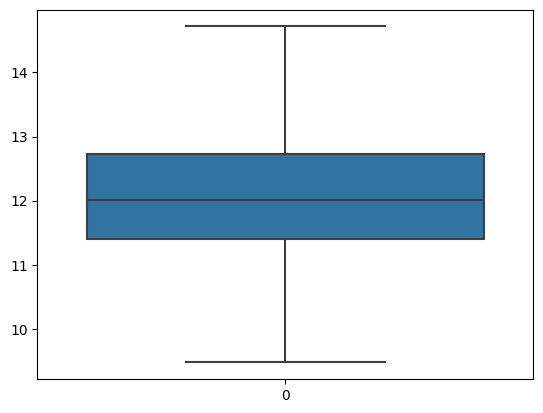

In [ ]:
# kita cek kembali apakah masih ada outliers pada Time on App
sns.boxplot(df['Time on App'])
plt.show()

In [ ]:
upper, lower = outliers(df, "Time on Website")
print("Upper: ", upper)
print("Lower: ", lower)

Upper:  39.777163619999996
Lower:  34.29770626


In [ ]:
df = df[df['Time on Website'] > lower]
df = df[df['Time on Website'] < upper]

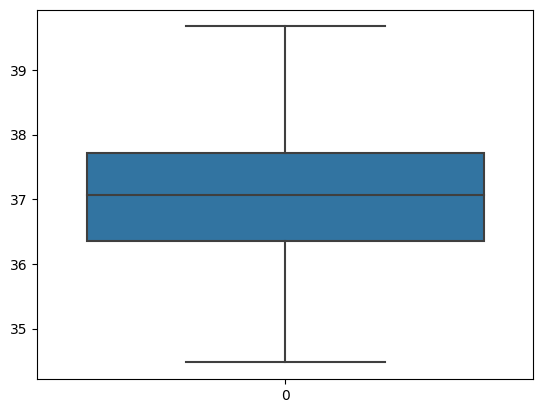

In [ ]:
sns.boxplot(df['Time on Website'])
plt.show()

<Axes: >

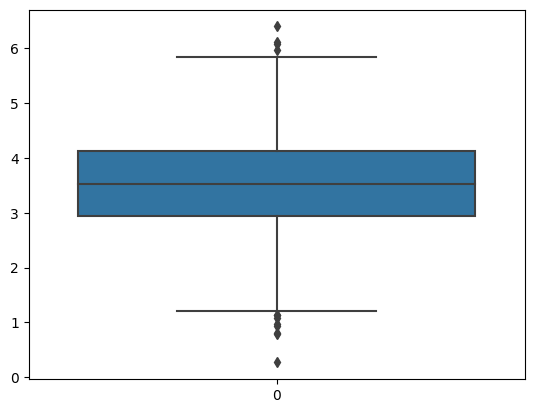

In [ ]:
sns.boxplot(df['Length of Membership'])

In [ ]:
upper, lower = outliers(df, "Length of Membership")
print("Upper: ", upper)
print("Lower: ", lower)

Upper:  5.910807792749999
Lower:  1.1551057467499999


In [ ]:
df = df[df['Length of Membership'] > lower]
df = df[df['Length of Membership'] < upper]

<Axes: >

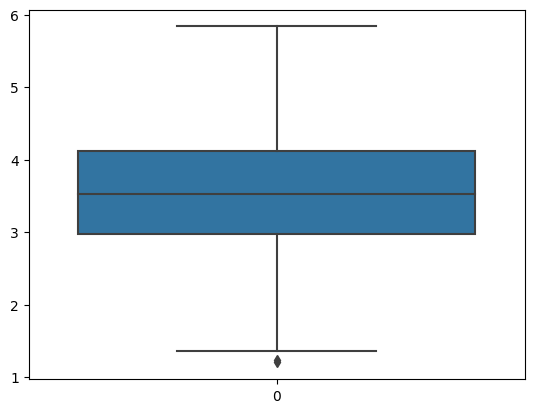

In [ ]:
sns.boxplot(df['Length of Membership'])

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
474,33.237660,13.566160,36.417985,3.746573,573.847438
475,34.702529,11.695736,37.190268,3.576526,529.049004
476,32.646777,11.499409,38.332576,4.958264,551.620146
477,33.322501,12.391423,36.840086,2.336485,456.469510


#Uji Linearitas

In [ ]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.011197,-0.004340,0.043357,0.367168
Time on App,-0.011197,1.000000,0.057347,-0.027439,0.490336
Time on Website,-0.004340,0.057347,1.000000,-0.051620,-0.005591
Length of Membership,0.043357,-0.027439,-0.051620,1.000000,0.774940
Yearly Amount Spent,0.367168,0.490336,-0.005591,0.774940,1.000000


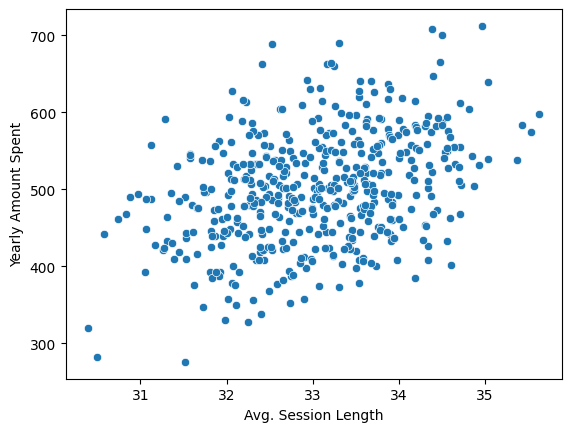

In [ ]:
sns.scatterplot(data=df, x="Avg. Session Length", y="Yearly Amount Spent")
plt.show()

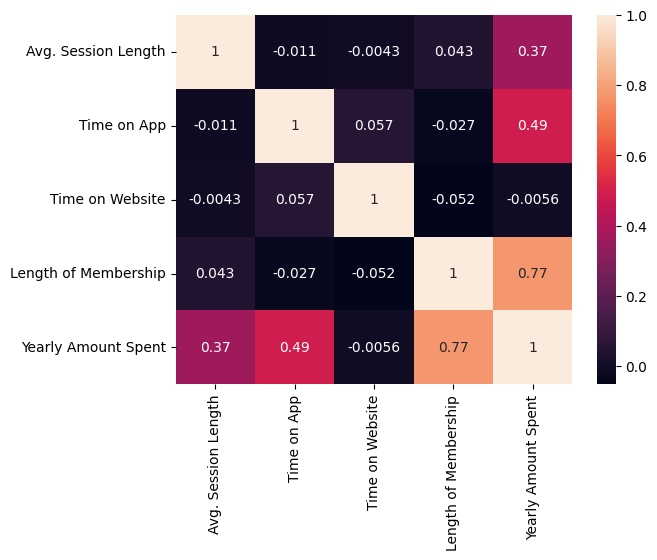

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

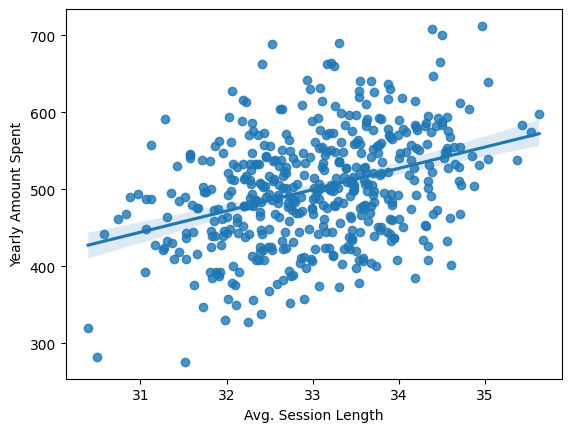

In [ ]:
sns.regplot(data=df, x="Avg. Session Length", y="Yearly Amount Spent")
plt.show()

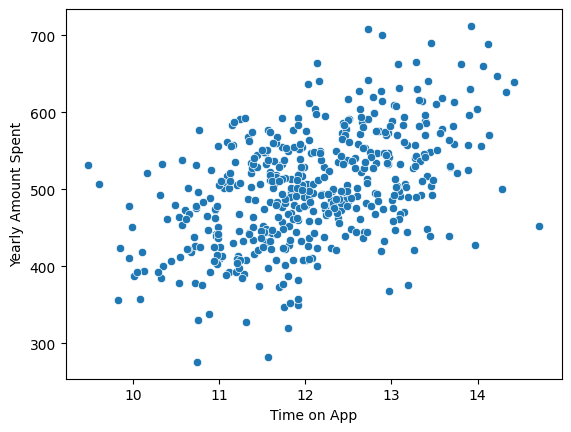

In [ ]:
sns.scatterplot(data=df, x="Time on App", y="Yearly Amount Spent")
plt.show()

<Axes: xlabel='Time on App', ylabel='Yearly Amount Spent'>

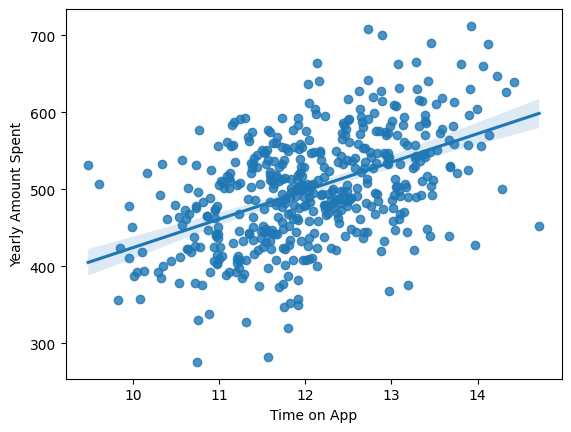

In [ ]:
sns.regplot(data=df, x="Time on App", y="Yearly Amount Spent")

<Axes: xlabel='Time on Website', ylabel='Yearly Amount Spent'>

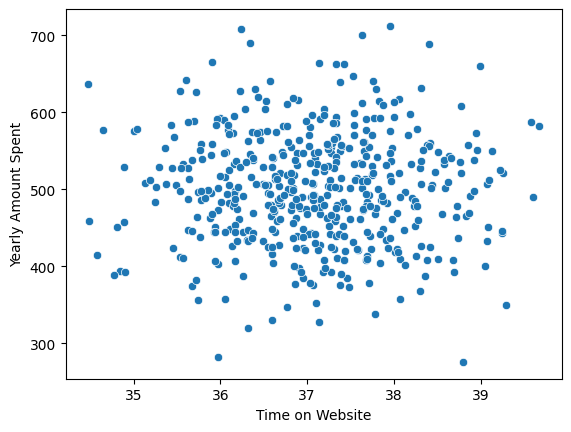

In [ ]:
sns.scatterplot(data=df, x="Time on Website", y="Yearly Amount Spent")

<Axes: xlabel='Time on Website', ylabel='Yearly Amount Spent'>

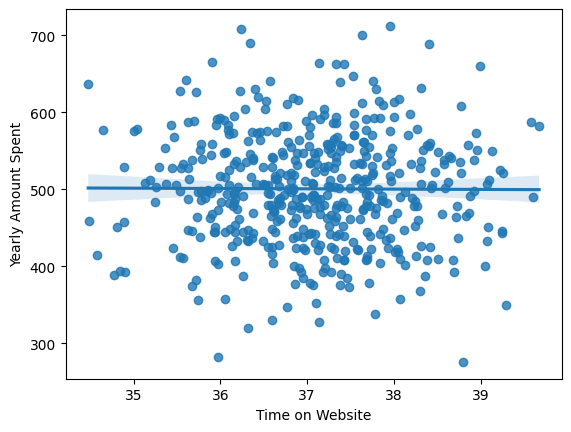

In [ ]:
sns.regplot(data=df, x="Time on Website", y="Yearly Amount Spent")

#Uji Heteroskedastisitas

In [ ]:
import pandas as pd
import seaborn as sns
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import acorr_ljungbox, het_white
from scipy.stats import kstest, shapiro

In [ ]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [ ]:
X = add_constant(X)

In [ ]:
X

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,1.0,34.497268,12.655651,39.577668,4.082621
1,1.0,31.926272,11.109461,37.268959,2.664034
2,1.0,33.000915,11.330278,37.110597,4.104543
3,1.0,34.305557,13.717514,36.721283,3.120179
4,1.0,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...,...
474,1.0,33.237660,13.566160,36.417985,3.746573
475,1.0,34.702529,11.695736,37.190268,3.576526
476,1.0,32.646777,11.499409,38.332576,4.958264
477,1.0,33.322501,12.391423,36.840086,2.336485


In [ ]:
model = OLS(y, X)
result = model.fit()
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.977
Model:                             OLS   Adj. R-squared:                  0.977
Method:                  Least Squares   F-statistic:                     5135.
Date:                 Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                         04:41:41   Log-Likelihood:                -1819.6
No. Observations:                  479   AIC:                             3649.
Df Residuals:                      474   BIC:                             3670.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [ ]:
# Uji Asumsi Independen dan Heteroskedastisitas
# opsional
residual = result.resid

In [ ]:
residual

0      -6.890939
1      11.413699
2     -17.844385
3      11.223716
4       7.498365
         ...    
474    -2.037991
475    -1.536862
476    -4.388754
477    10.603560
478    16.752444
Length: 479, dtype: float64

In [ ]:
het_result = het_white(residual, X)

print('LM stat = {0:.3f}'.format(het_result[0]))
print('LM p-value = {0:.3f}'.format(het_result[1]))
print('F stat = {0:.3f}'.format(het_result[2]))
print('F p-value = {0:.3f}'.format(het_result[3]))

LM stat = 12.524
LM p-value = 0.564
F stat = 0.890
F p-value = 0.570


Hasil dari Uji Heteroskedastisitas menggunakan metode White's Lagrange Multiplier(LM) menunjukkan bahwa nilai statistik LM adalah 12.524 dan p-value sebesa 0.564

Bila menggunakan threshold 0.05 sebagai tingkat signifikansi, maka dapat dinyatakan bahwa p-value (0.564) lebih besar dari tingkat signifikansi tersebut. Oleh karena itu, tidak cukup bukti untuk menolak hipotesis nol bahwa tidak ada heteroskedastisitas dalam model.

Selain itu, juga diperoleh nilai F stat sebesar 0.890 dan F p-value sebesar 0.570. Dalam kasus ini, karena nilai F p-value juga lebih besar dari threshold 0.05, maka dapat disimpulkan bahwa tidak terdapat bukti yang cukup untuk menolak hipotesis nol bahwa tidak ada heteroskedastisitas dalam model dengan menggunakan uji White's Lagrange Multiplier.

In [ ]:
# Uji Asumsi Normalitas Residual
# kstest sering digunakan

model_residual = residual
kstest(model_residual, 'norm')

KstestResult(statistic=0.41908925253773777, pvalue=9.52917186808244e-77, statistic_location=-2.2912881090483097, statistic_sign=1)

Angka 9.5291e-77 yang muncul dalam hasil K-S test sebenarnya merupakan notasi ilmiah atau notasi eksponensial dari bilangan riil yang sangat kecil.

Angka tersebut mendekati nilai nol sehingga kita menganggap bahwa bukti tersebut bisa dianggap cukup kuat untuk menolak hipotesis nol bahwa residual mengikuti distribusi normal.

Walau residual tidak memenuhi asumsi normalitas, hal ini tidak selalu menyatakan model regresi tidak dapat digunakan. Model regresi masih dapat memberikan hasil yang baik bila nilai residual masih terdistribusi secara beragam dan memiliki variasi yang konstan. Namun, jika asumsi normalitas tidak terpenuhi dan juga terdapat indikasi heteroskedastisitas pada residual, maka hasil regresi dapat menjadi tidak valid dan interpretasi hasilnya juga menjadi tidak dapat diandalkan.

In [ ]:
shapiro(model_residual)

ShapiroResult(statistic=0.9834681153297424, pvalue=2.8624590413528495e-05)

Berdasarkan hasil uji normalitas residual menggunakan metode Shapiro-Wilk test, didapatkan nilai statistik sebesar 0.9834 dan p-value sebesar 0.0000028624590413528495.

Jika menggunakan threshold 0.05 sebagai tingkat signifikansi, maka dapat dinyatakan bahwa p-value sangat kecil hingga gampir 0. Oleh karena itu, ini dapat dianggap sebagai bukti kuat untuk menolak hipotesis nol bahwa residual mengikuti distribusi normal.

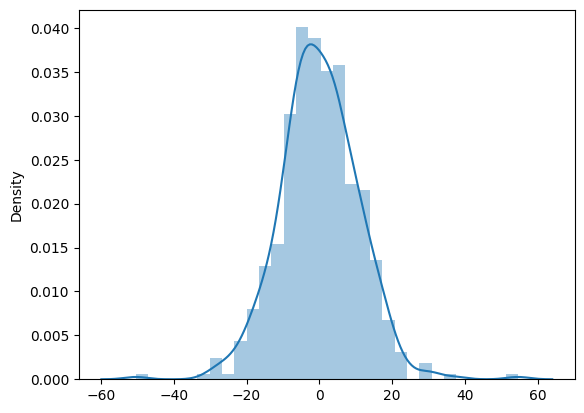

In [ ]:
import seaborn as sns
sns.distplot(residual, kde = True)
plt.show()

# Model Building Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(383, 4) (383,) (96, 4) (96,)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
example = [[50, 150, 50, 150]]
output = model.predict(example)
output

array([15338.1739548])

In [ ]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
93,34.183821,13.349913,37.827394,4.252006
320,31.976480,10.757131,36.595868,1.977007
55,34.301870,10.568295,36.173126,3.315225
30,33.461056,10.869164,35.622442,3.471413
449,32.518197,11.509253,36.599289,3.022676
...,...,...,...,...
249,32.550527,13.041245,36.655208,3.456234
393,32.992573,13.004362,36.985041,4.620416
425,32.212924,11.732991,35.633954,4.331863
42,32.893981,11.529878,36.888086,4.643259


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([624.37069094, 325.44295962, 459.8850474 , 459.2310245 ,
       433.05846463, 493.88781385, 449.45072201, 474.75453659,
       370.86382428, 441.37652452, 526.34801256, 508.87960063,
       557.2474123 , 589.56358275, 504.04030154, 486.3939367 ,
       513.24758011, 397.97618975, 465.72155779, 559.25097433,
       384.3441674 , 448.81061786, 481.9547646 , 553.3674979 ,
       464.37343602, 595.89457272, 594.6994137 , 513.80052512,
       559.58799639, 513.55084737, 533.04033226, 528.68172054,
       476.37711381, 509.19588666, 456.75361721, 540.58027031,
       571.14758799, 597.15723347, 565.15082328, 553.21077993,
       472.57850891, 531.9587642 , 502.57198494, 467.34672914,
       450.18192366, 458.82987962, 404.98352736, 479.22720459,
       511.83582724, 527.92212646, 478.20895012, 574.21204412,
       620.34352213, 518.7100058 , 482.97545561, 416.96491912,
       609.84117069, 450.12936979, 463.99187154, 532.08806762,
       545.93778084, 668.68692937, 534.55099925, 337.93

In [ ]:
y_test

93     614.715334
320    330.594446
55     453.169502
30     447.687906
449    424.728774
          ...    
249    514.009818
393    589.026490
425    513.153112
42     547.244343
228    398.163469
Name: Yearly Amount Spent, Length: 96, dtype: float64

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score is:', r2_score(y_test, y_pred))

Mean Absolute Error: 8.967253743577118
Mean Squared Error: 127.97726937812014
Root Mean Squared Error: 11.312703893328074
R Squared Score is: 0.9698156442948641
